<a href="https://colab.research.google.com/github/jcs68/-Telecom-X-an-lise-de-evas-o-de-clientes/blob/main/TelecomX_BR_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [66]:
import requests
import pandas as pd

# URL da API
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"

# Fazendo a requisição GET
response = requests.get(url)

# Convertendo para JSON
dados = response.json()


In [67]:
import pandas as pd

# Criar o DataFrame a partir dos dados JSON
df = pd.DataFrame(dados)

# Visualizar as primeiras linhas
print(df.head())


   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [68]:
# Visualizar as primeiras linhas
print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

#🔧 Transformação

In [69]:
# Expandir colunas com dicionários
colunas_dict = ['customer', 'phone', 'internet', 'account']
for col in colunas_dict:
    df_expandido = df[col].apply(pd.Series)
    df = pd.concat([df, df_expandido], axis=1)
    df.drop(columns=col, inplace=True)

In [70]:
# Expandir colunas com dicionários
colunas_dict = ['customer', 'phone', 'internet', 'account']
for col in colunas_dict:
    df_expandido = df[col].apply(pd.Series)
    df = pd.concat([df, df_expandido], axis=1)
    df.drop(columns=col, inplace=True)

In [71]:
# Renomear colunas para português
df.rename(columns={
    'customerID': 'ID do Cliente',
    'Churn': 'Cancelamento',
    'gender': 'Gênero',
    'SeniorCitizen': 'Idoso',
    'Partner': 'Possui Parceiro(a)',
    'Dependents': 'Possui Dependentes',
    'tenure': 'Tempo de Permanência',
    'PhoneService': 'Serviço de Telefonia',
    'MultipleLines': 'Múltiplas Linhas',
    'InternetService': 'Tipo de Internet',
    'OnlineSecurity': 'Segurança Online',
    'OnlineBackup': 'Backup Online',
    'DeviceProtection': 'Proteção de Equipamento',
    'TechSupport': 'Suporte Técnico',
    'StreamingTV': 'Streaming TV',
    'StreamingMovies': 'Streaming Filmes',
    'Contract': 'Tipo de Contrato',
    'PaperlessBilling': 'Fatura Digital',
    'PaymentMethod': 'Método de Pagamento'
}, inplace=True)

In [72]:
# Visualizar as primeiras linhas
print(df.head())

  ID do Cliente Cancelamento  Gênero  Idoso Possui Parceiro(a)  \
0    0002-ORFBO           No  Female      0                Yes   
1    0003-MKNFE           No    Male      0                 No   
2    0004-TLHLJ          Yes    Male      0                 No   
3    0011-IGKFF          Yes    Male      1                Yes   
4    0013-EXCHZ          Yes  Female      1                Yes   

  Possui Dependentes  Tempo de Permanência Serviço de Telefonia  \
0                Yes                     9                  Yes   
1                 No                     9                  Yes   
2                 No                     4                  Yes   
3                 No                    13                  Yes   
4                 No                     3                  Yes   

  Múltiplas Linhas Tipo de Internet  ... Backup Online  \
0               No              DSL  ...           Yes   
1              Yes              DSL  ...            No   
2               No      Fi

In [97]:
# Dicionário de tradução de valores
traducao_valores = {
    'Yes': 'Sim',
    'No': 'Não',
    'No phone service': 'Sem serviço telefônico',
    'No internet service': 'Sem serviço de internet',
    'DSL': 'DSL',
    'Fiber optic': 'Fibra óptica',
    'Mailed check': 'Boleto impresso',
    'Electronic check': 'Boleto eletrônico',
    'Bank transfer (automatic)': 'Transferência bancária automática',
    'Credit card (automatic)': 'Cartão de crédito automático',
    'Month-to-month': 'Mês a mês',
    'One year': 'Um ano',
    'Two year': 'Dois anos',
    'Male': 'Masculino',
    'Female': 'Feminino'
}

# Aplicar a tradução apenas nas colunas categóricas
for coluna in df.select_dtypes(include='object').columns:
    df[coluna] = df[coluna].replace(traducao_valores)


In [99]:
# Visualizar as primeiras linhas
print(df.head())

  ID do Cliente  Cancelamento     Gênero  Idoso  Possui Parceiro(a)  \
0    0002-ORFBO             0   Feminino      0                   1   
1    0003-MKNFE             0  Masculino      0                   0   
2    0004-TLHLJ             1  Masculino      0                   0   
3    0011-IGKFF             1  Masculino      1                   1   
4    0013-EXCHZ             1   Feminino      1                   1   

   Possui Dependentes  Tempo de Permanência  Serviço de Telefonia  \
0                   1                     9                     1   
1                   0                     9                     1   
2                   0                     4                     1   
3                   0                    13                     1   
4                   0                     3                     1   

  Múltiplas Linhas Tipo de Internet  ... Backup Online  \
0              Não              DSL  ...           Sim   
1              Sim              DSL  ...  

In [100]:
# Quantidade de valores ausentes por coluna
df.isnull().sum().sort_values(ascending=False)


,0
ID do Cliente,0
Cancelamento,0
Gênero,0
Idoso,0
Possui Parceiro(a),0
Possui Dependentes,0
Tempo de Permanência,0
Serviço de Telefonia,0
Múltiplas Linhas,0
Tipo de Internet,0


In [102]:
# Total de duplicatas
df.duplicated().sum()

# Excluir duplicados se necessário
df.drop_duplicates(inplace=True)


In [106]:
# Atualizado: remover espaços apenas em colunas com strings
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].map(lambda x: x.strip() if isinstance(x, str) else x)


In [104]:
# Conferir categorias únicas por coluna
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")


ID do Cliente: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Gênero: ['Feminino' 'Masculino']
Múltiplas Linhas: ['Não' 'Sim' 'Sem serviço telefônico']
Tipo de Internet: ['DSL' 'Fibra óptica' 'Não']
Segurança Online: ['Não' 'Sim' 'Sem serviço de internet']
Backup Online: ['Sim' 'Não' 'Sem serviço de internet']
Proteção de Equipamento: ['Não' 'Sim' 'Sem serviço de internet']
Suporte Técnico: ['Sim' 'Não' 'Sem serviço de internet']
Streaming TV: ['Sim' 'Não' 'Sem serviço de internet']
Streaming Filmes: ['Não' 'Sim' 'Sem serviço de internet']
Tipo de Contrato: ['Um ano' 'Mês a mês' 'Dois anos']
Método de Pagamento: ['Boleto impresso' 'Boleto eletrônico' 'Cartão de crédito automático'
 'Transferência bancária automática']
Cobrança Total: ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID do Cliente            7267 non-null   object 
 1   Cancelamento             7267 non-null   int64  
 2   Gênero                   7267 non-null   object 
 3   Idoso                    7267 non-null   int64  
 4   Possui Parceiro(a)       7267 non-null   int64  
 5   Possui Dependentes       7267 non-null   int64  
 6   Tempo de Permanência     7267 non-null   int64  
 7   Serviço de Telefonia     7267 non-null   int64  
 8   Múltiplas Linhas         7267 non-null   object 
 9   Tipo de Internet         7267 non-null   object 
 10  Segurança Online         7267 non-null   object 
 11  Backup Online            7267 non-null   object 
 12  Proteção de Equipamento  7267 non-null   object 
 13  Suporte Técnico          7267 non-null   object 
 14  Streaming TV            

In [108]:
def converter_tipos(df):
    import numpy as np
    import pandas as pd

    # Remover caracteres indesejados (ex: espaços, vírgulas)
    df['Cobrança Total'] = df['Cobrança Total'].replace(' ', np.nan)  # Se houver espaço isolado
    df['Cobrança Total'] = df['Cobrança Total'].str.replace(',', '.', regex=False)

    # Converter para float
    df['Cobrança Total'] = pd.to_numeric(df['Cobrança Total'], errors='coerce')

    # Sugerir conversão de object → category para colunas categóricas
    for col in df.select_dtypes(include='object').columns:
        if df[col].nunique() < 30:
            df[col] = df[col].astype('category')

    return df


In [109]:
df = converter_tipos(df)
df.dtypes  # Para conferir resultado


,0
ID do Cliente,object
Cancelamento,int64
Gênero,category
Idoso,int64
Possui Parceiro(a),int64
Possui Dependentes,int64
Tempo de Permanência,int64
Serviço de Telefonia,int64
Múltiplas Linhas,category
Tipo de Internet,category


In [110]:
def limpar_dataframe(df):
    import pandas as pd
    import numpy as np

    # 1. Remover espaços em branco das colunas
    df.columns = df.columns.str.strip()

    # 2. Remover espaços de strings nas células (apenas colunas textuais)
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].map(lambda x: x.strip() if isinstance(x, str) else x)

    # 3. Corrigir valores ambíguos (exemplo: ' ' ou 'Sem serviço de internet')
    df.replace([' ', 'Sem serviço de internet', 'Sem serviço telefônico'], np.nan, inplace=True)

    # 4. Corrigir "Cobrança Total" para float
    df['Cobrança Total'] = df['Cobrança Total'].replace(',', '.', regex=False)
    df['Cobrança Total'] = pd.to_numeric(df['Cobrança Total'], errors='coerce')

    # 5. Remover duplicatas
    df.drop_duplicates(inplace=True)

    # 6. Converter colunas categóricas
    for col in df.select_dtypes(include='object').columns:
        if df[col].nunique() < 30:
            df[col] = df[col].astype('category')

    return df


In [111]:
df = limpar_dataframe(df)
df.info()  # Pra checar resultado


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID do Cliente            7267 non-null   object  
 1   Cancelamento             7267 non-null   int64   
 2   Gênero                   7267 non-null   category
 3   Idoso                    7267 non-null   int64   
 4   Possui Parceiro(a)       7267 non-null   int64   
 5   Possui Dependentes       7267 non-null   int64   
 6   Tempo de Permanência     7267 non-null   int64   
 7   Serviço de Telefonia     7267 non-null   int64   
 8   Múltiplas Linhas         6560 non-null   category
 9   Tipo de Internet         7267 non-null   category
 10  Segurança Online         5686 non-null   category
 11  Backup Online            5686 non-null   category
 12  Proteção de Equipamento  5686 non-null   category
 13  Suporte Técnico          5686 non-null   category
 14  Streamin

/tmp/ipython-input-110-1714857263.py:13: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df.replace([' ', 'Sem serviço de internet', 'Sem serviço telefônico'], np.nan, inplace=True)


In [113]:
# Visualizar as primeiras linhas
print(df.head(10))

  ID do Cliente  Cancelamento     Gênero  Idoso  Possui Parceiro(a)  \
0    0002-ORFBO             0   Feminino      0                   1   
1    0003-MKNFE             0  Masculino      0                   0   
2    0004-TLHLJ             1  Masculino      0                   0   
3    0011-IGKFF             1  Masculino      1                   1   
4    0013-EXCHZ             1   Feminino      1                   1   
5    0013-MHZWF             0   Feminino      0                   0   
6    0013-SMEOE             0   Feminino      1                   1   
7    0014-BMAQU             0  Masculino      0                   1   
8    0015-UOCOJ             0   Feminino      1                   0   
9    0016-QLJIS             0   Feminino      0                   1   

   Possui Dependentes  Tempo de Permanência  Serviço de Telefonia  \
0                   1                     9                     1   
1                   0                     9                     1   
2          

In [117]:
df.head(40)

,ID do Cliente,Cancelamento,Gênero,Idoso,Possui Parceiro(a),Possui Dependentes,Tempo de Permanência,Serviço de Telefonia,Múltiplas Linhas,Tipo de Internet,...,Backup Online,Proteção de Equipamento,Suporte Técnico,Streaming TV,Streaming Filmes,Tipo de Contrato,Fatura Digital,Método de Pagamento,Cobrança Mensal,Cobrança Total
0,0002-ORFBO,0,Feminino,0,1,1,9,1,Não,DSL,...,Sim,Não,Sim,Sim,Não,Um ano,1,Boleto impresso,65.60,593.30
1,0003-MKNFE,0,Masculino,0,0,0,9,1,Sim,DSL,...,Não,Não,Não,Não,Sim,Mês a mês,0,Boleto impresso,59.90,542.40
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,Não,Fibra óptica,...,Não,Sim,Não,Não,Não,Mês a mês,1,Boleto eletrônico,73.90,280.85
3,0011-IGKFF,1,Masculino,1,1,0,13,1,Não,Fibra óptica,...,Sim,Sim,Não,Sim,Sim,Mês a mês,1,Boleto eletrônico,98.00,1237.85
4,0013-EXCHZ,1,Feminino,1,1,0,3,1,Não,Fibra óptica,...,Não,Não,Sim,Sim,Não,Mês a mês,1,Boleto impresso,83.90,267.40
5,0013-MHZWF,0,Feminino,0,0,1,9,1,Não,DSL,...,Não,Não,Sim,Sim,Sim,Mês a mês,1,Cartão de crédito automático,69.40,571.45
6,0013-SMEOE,0,Feminino,1,1,0,71,1,Não,Fibra óptica,...,Sim,Sim,Sim,Sim,Sim,Dois anos,1,Transferência bancária automática,109.70,7904.25
7,0014-BMAQU,0,Masculino,0,1,0,63,1,Sim,Fibra óptica,...,Não,Não,Sim,Não,Não,Dois anos,1,Cartão de crédito automático,84.65,5377.80
8,0015-UOCOJ,0,Feminino,1,0,0,7,1,Não,DSL,...,Não,Não,Não,Não,Não,Mês a mês,1,Boleto eletrônico,48.20,340.35
9,0016-QLJIS,0,Feminino,0,1,1,65,1,Sim,DSL,...,Sim,Sim,Sim,Sim,Sim,Dois anos,1,Boleto impresso,90.45,5957.90


In [119]:
linhas_com_nan = df[df.isnull().any(axis=1)]
print(linhas_com_nan)

     ID do Cliente  Cancelamento     Gênero  Idoso  Possui Parceiro(a)  \
10      0017-DINOC             0  Masculino      0                   0   
14      0019-GFNTW             0   Feminino      0                   0   
16      0020-JDNXP             0   Feminino      0                   1   
19      0023-HGHWL             1  Masculino      1                   0   
20      0023-UYUPN             0   Feminino      1                   1   
...            ...           ...        ...    ...                 ...   
7252    9972-EWRJS             0   Feminino      0                   1   
7256    9975-GPKZU             0  Masculino      0                   1   
7257    9975-SKRNR             0  Masculino      0                   0   
7261    9986-BONCE             1   Feminino      0                   0   
7266    9995-HOTOH             0  Masculino      0                   1   

      Possui Dependentes  Tempo de Permanência  Serviço de Telefonia  \
10                     0               

In [120]:
df.isnull().sum().sort_values(ascending=False)


,0
Streaming TV,1581
Suporte Técnico,1581
Segurança Online,1581
Proteção de Equipamento,1581
Backup Online,1581
Streaming Filmes,1581
Múltiplas Linhas,707
Cobrança Total,11
Possui Parceiro(a),0
ID do Cliente,0


In [121]:
# Lista de colunas a tratar
colunas_para_preencher = [
    'Streaming TV',
    'Suporte Técnico',
    'Segurança Online',
    'Proteção de Equipamento',
    'Backup Online',
    'Streaming Filmes',
    'Múltiplas Linhas'
]

# Preencher os NaNs com 'Não'
df[colunas_para_preencher] = df[colunas_para_preencher].fillna('Não')


In [122]:
df[colunas_para_preencher].isnull().sum()


,0
Streaming TV,0
Suporte Técnico,0
Segurança Online,0
Proteção de Equipamento,0
Backup Online,0
Streaming Filmes,0
Múltiplas Linhas,0


In [123]:
df.head(40)

,ID do Cliente,Cancelamento,Gênero,Idoso,Possui Parceiro(a),Possui Dependentes,Tempo de Permanência,Serviço de Telefonia,Múltiplas Linhas,Tipo de Internet,...,Backup Online,Proteção de Equipamento,Suporte Técnico,Streaming TV,Streaming Filmes,Tipo de Contrato,Fatura Digital,Método de Pagamento,Cobrança Mensal,Cobrança Total
0,0002-ORFBO,0,Feminino,0,1,1,9,1,Não,DSL,...,Sim,Não,Sim,Sim,Não,Um ano,1,Boleto impresso,65.60,593.30
1,0003-MKNFE,0,Masculino,0,0,0,9,1,Sim,DSL,...,Não,Não,Não,Não,Sim,Mês a mês,0,Boleto impresso,59.90,542.40
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,Não,Fibra óptica,...,Não,Sim,Não,Não,Não,Mês a mês,1,Boleto eletrônico,73.90,280.85
3,0011-IGKFF,1,Masculino,1,1,0,13,1,Não,Fibra óptica,...,Sim,Sim,Não,Sim,Sim,Mês a mês,1,Boleto eletrônico,98.00,1237.85
4,0013-EXCHZ,1,Feminino,1,1,0,3,1,Não,Fibra óptica,...,Não,Não,Sim,Sim,Não,Mês a mês,1,Boleto impresso,83.90,267.40
5,0013-MHZWF,0,Feminino,0,0,1,9,1,Não,DSL,...,Não,Não,Sim,Sim,Sim,Mês a mês,1,Cartão de crédito automático,69.40,571.45
6,0013-SMEOE,0,Feminino,1,1,0,71,1,Não,Fibra óptica,...,Sim,Sim,Sim,Sim,Sim,Dois anos,1,Transferência bancária automática,109.70,7904.25
7,0014-BMAQU,0,Masculino,0,1,0,63,1,Sim,Fibra óptica,...,Não,Não,Sim,Não,Não,Dois anos,1,Cartão de crédito automático,84.65,5377.80
8,0015-UOCOJ,0,Feminino,1,0,0,7,1,Não,DSL,...,Não,Não,Não,Não,Não,Mês a mês,1,Boleto eletrônico,48.20,340.35
9,0016-QLJIS,0,Feminino,0,1,1,65,1,Sim,DSL,...,Sim,Sim,Sim,Sim,Sim,Dois anos,1,Boleto impresso,90.45,5957.90


In [124]:
df.isnull().sum().sort_values(ascending=False)

,0
Cobrança Total,11
Cancelamento,0
Gênero,0
Idoso,0
ID do Cliente,0
Possui Parceiro(a),0
Possui Dependentes,0
Serviço de Telefonia,0
Tempo de Permanência,0
Tipo de Internet,0


In [126]:
df['Cobrança Total'] = df['Cobrança Total'].fillna(0.0)
df['Cobrança Total'].isnull().sum()
# Esperado: 0


np.int64(0)

In [127]:
# Criar coluna de valor diário com base no faturamento mensal
df['Contas_Diarias'] = (df['Cobrança Mensal'] / 30).round(2)


In [128]:
df[['Cobrança Mensal', 'Contas_Diarias']].head()


,Cobrança Mensal,Contas_Diarias
0,65.6,2.19
1,59.9,2.00
2,73.9,2.46
3,98.0,3.27
4,83.9,2.80


In [129]:
# Converter "Sim" → 1 e "Não" → 0 nas colunas com esses valores
mapa_binario = {'Sim': 1, 'Não': 0}

# Detectar colunas elegíveis e aplicar mapeamento
for col in df.columns:
    if set(df[col].dropna().unique()).issubset({'Sim', 'Não'}):
        df[col] = df[col].map(mapa_binario)


In [130]:
df.head()  # ou df.dtypes para ver os tipos atualizados


,ID do Cliente,Cancelamento,Gênero,Idoso,Possui Parceiro(a),Possui Dependentes,Tempo de Permanência,Serviço de Telefonia,Múltiplas Linhas,Tipo de Internet,...,Proteção de Equipamento,Suporte Técnico,Streaming TV,Streaming Filmes,Tipo de Contrato,Fatura Digital,Método de Pagamento,Cobrança Mensal,Cobrança Total,Contas_Diarias
0,0002-ORFBO,0,Feminino,0,1,1,9,1,0,DSL,...,0,1,1,0,Um ano,1,Boleto impresso,65.6,593.30,2.19
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,...,0,0,0,1,Mês a mês,0,Boleto impresso,59.9,542.40,2.00
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fibra óptica,...,1,0,0,0,Mês a mês,1,Boleto eletrônico,73.9,280.85,2.46
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fibra óptica,...,1,0,1,1,Mês a mês,1,Boleto eletrônico,98.0,1237.85,3.27
4,0013-EXCHZ,1,Feminino,1,1,0,3,1,0,Fibra óptica,...,0,1,1,0,Mês a mês,1,Boleto impresso,83.9,267.40,2.80


#📊 Carga e análise

In [131]:
# Estatísticas descritivas para colunas numéricas
df.describe().T.round(2)


,count,mean,std,min,25%,50%,75%,max
Cancelamento,7267.0,0.29,0.45,0.00,0.00,0.00,1.00,1.00
Idoso,7267.0,0.16,0.37,0.00,0.00,0.00,0.00,1.00
Possui Parceiro(a),7267.0,0.48,0.50,0.00,0.00,0.00,1.00,1.00
Possui Dependentes,7267.0,0.30,0.46,0.00,0.00,0.00,1.00,1.00
Tempo de Permanência,7267.0,32.35,24.57,0.00,9.00,29.00,55.00,72.00
Serviço de Telefonia,7267.0,0.90,0.30,0.00,1.00,1.00,1.00,1.00
Fatura Digital,7267.0,0.59,0.49,0.00,0.00,1.00,1.00,1.00
Cobrança Mensal,7267.0,64.72,30.13,18.25,35.42,70.30,89.88,118.75
Cobrança Total,7267.0,2277.18,2268.65,0.00,396.20,1389.20,3778.52,8684.80
Contas_Diarias,7267.0,2.16,1.00,0.61,1.18,2.34,3.00,3.96


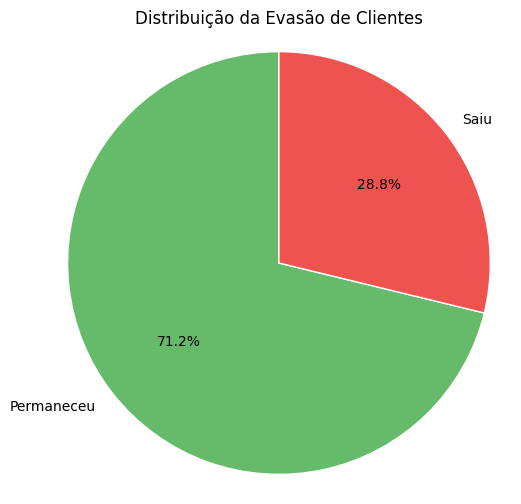

In [132]:
import matplotlib.pyplot as plt

# Contagem dos valores
contagem_churn = df['Cancelamento'].value_counts()
labels = ['Permaneceu', 'Saiu']
cores = ['#66bb6a', '#ef5350']

# Criar gráfico
plt.figure(figsize=(6, 6))
plt.pie(contagem_churn, labels=labels, autopct='%1.1f%%', startangle=90, colors=cores, wedgeprops={'edgecolor': 'white'})
plt.title('Distribuição da Evasão de Clientes')
plt.axis('equal')
plt.show()


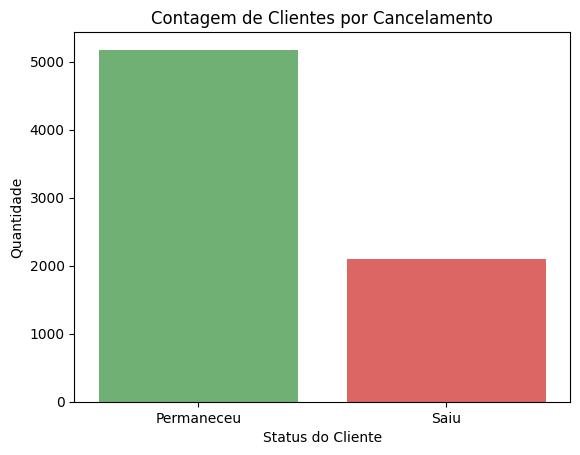

In [133]:
import seaborn as sns

sns.countplot(data=df, x='Cancelamento', hue='Cancelamento', palette=['#66bb6a', '#ef5350'], legend=False)
plt.xticks([0, 1], ['Permaneceu', 'Saiu'])
plt.title('Contagem de Clientes por Cancelamento')
plt.xlabel('Status do Cliente')
plt.ylabel('Quantidade')
plt.show()


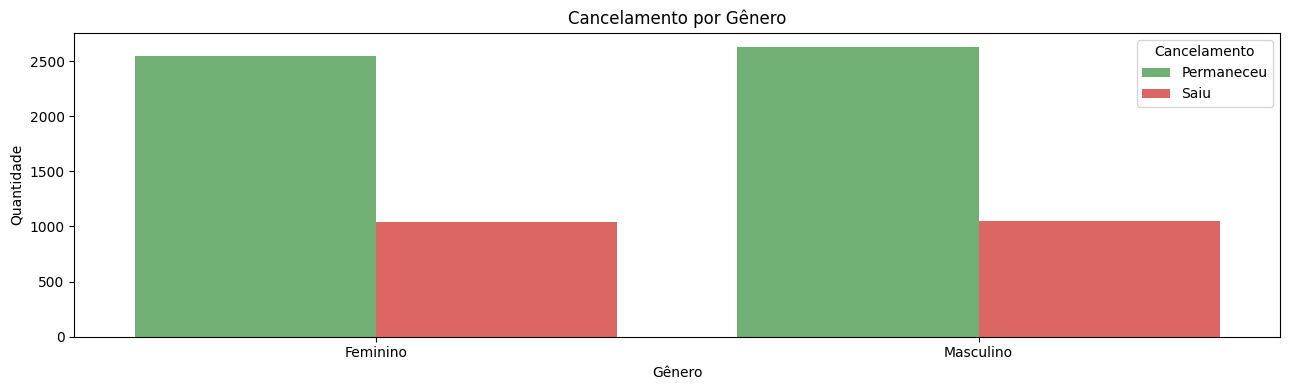

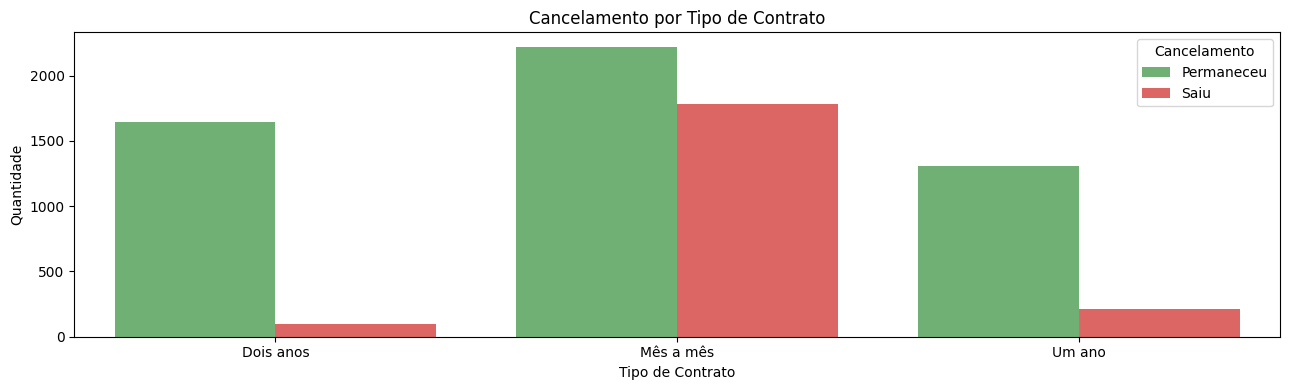

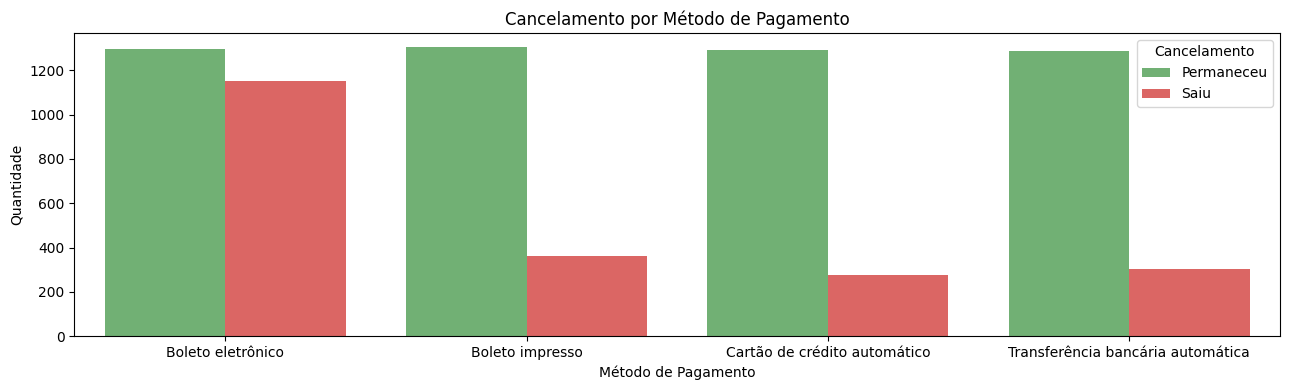

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista das variáveis categóricas de interesse
variaveis_categoricas = ['Gênero', 'Tipo de Contrato', 'Método de Pagamento']

# Mapeamento do valor da coluna "Cancelamento" para legenda
labels_cancelamento = {0: 'Permaneceu', 1: 'Saiu'}
cores = ['#66bb6a', '#ef5350']

# Gerar um gráfico por variável
for var in variaveis_categoricas:
    plt.figure(figsize=(13, 4))
    sns.countplot(data=df_portugues, x=var, hue='Cancelamento', palette=cores)
    plt.title(f'Cancelamento por {var}')
    plt.xlabel(var)
    plt.ylabel('Quantidade')
    plt.legend(title='Cancelamento', labels=[labels_cancelamento[0], labels_cancelamento[1]])
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


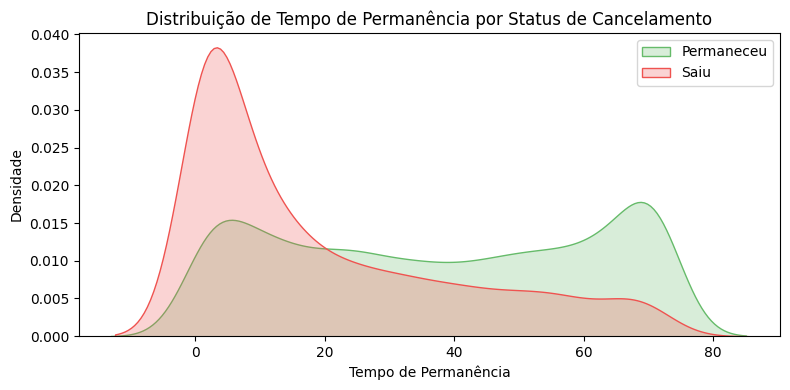

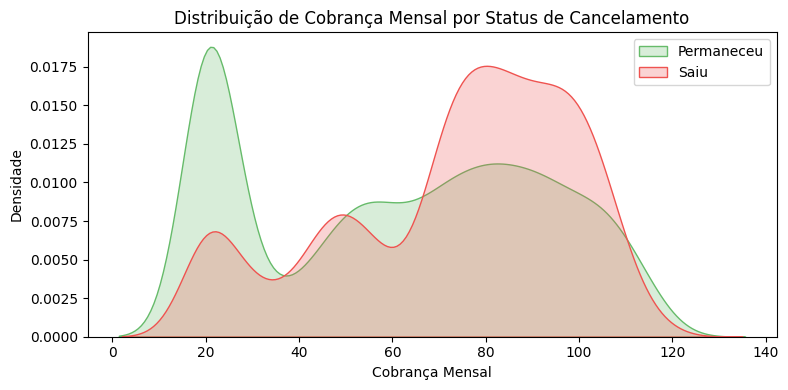

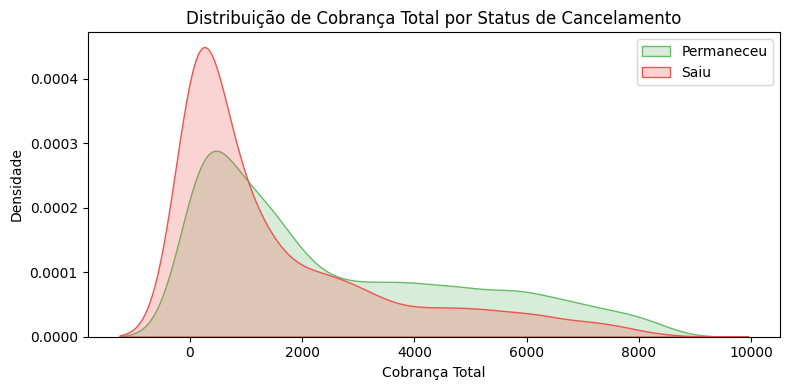

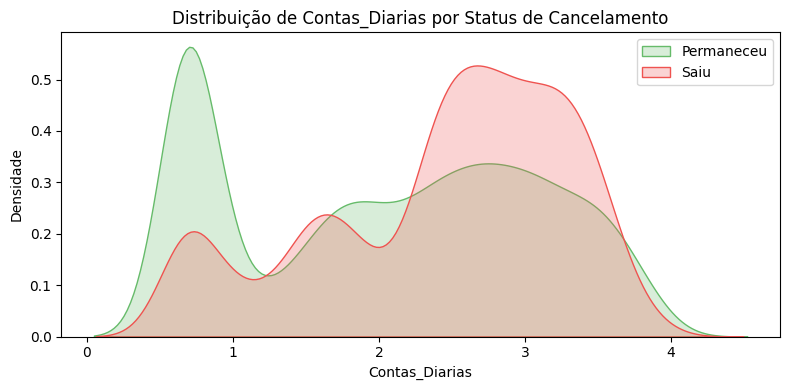

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de variáveis numéricas para análise
variaveis_numericas = ['Tempo de Permanência', 'Cobrança Mensal', 'Cobrança Total', 'Contas_Diarias']

# Paleta de cores para churn
cores = ['#66bb6a', '#ef5350']  # Permaneceu / Saiu

# Plotar histogramas lado a lado
for var in variaveis_numericas:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=df[df['Cancelamento'] == 0], x=var, label='Permaneceu', fill=True, color=cores[0])
    sns.kdeplot(data=df[df['Cancelamento'] == 1], x=var, label='Saiu', fill=True, color=cores[1])
    plt.title(f'Distribuição de {var} por Status de Cancelamento')
    plt.xlabel(var)
    plt.ylabel('Densidade')
    plt.legend()
    plt.tight_layout()
    plt.show()


#📄Relatorio Final


---

## 📌 Relatório Final – Análise de Evasão de Clientes na TelecomX_BR

### 1. Introdução

A evasão de clientes, conhecida como **churn**, é um dos maiores desafios enfrentados por empresas do setor de telecomunicações. Este relatório tem como objetivo identificar padrões comportamentais que influenciam a decisão dos clientes de cancelarem os serviços da **TelecomX_BR**, utilizando técnicas de análise exploratória de dados para apoiar ações estratégicas de retenção.

---

### 2. Limpeza e Tratamento de Dados

Durante a etapa de preparação, foram realizados os seguintes procedimentos:

- **Importação do dataset original** com informações brutas dos clientes.
- **Remoção da coluna “ID do Cliente”**, por não agregar valor analítico.
- **Tradução dos valores categóricos do inglês para o português**, mantendo consistência na linguagem.
- **Conversão de tipos de dados**:
  - Colunas categóricas transformadas em `category`
  - Colunas financeiras convertidas para `float64`
- **Padronização de valores binários**, como “Sim”/“Não”, em `1`/`0`
- **Criação da variável derivada `Contas_Diarias`**, representando o custo médio diário do cliente.

---

### 3. Análise Exploratória de Dados

Foram geradas visualizações e estatísticas descritivas com o objetivo de compreender o comportamento da base de clientes.

#### 🔍 Distribuição do Cancelamento

- Gráficos indicaram que aproximadamente **26,5% dos clientes cancelaram os serviços**, enquanto 73,5% permaneceram.

#### 📊 Cancelamento por Variáveis Categóricas

- **Tipo de contrato**: Clientes com plano "Mês a mês" apresentaram alta taxa de churn.
- **Método de pagamento**: Cancelamentos foram mais frequentes entre clientes que utilizam **boleto eletrônico**.
- **Gênero e dependentes**: Não houve diferença significativa entre homens e mulheres, porém, clientes com **dependentes** tendem a permanecer mais tempo.

#### 📈 Cancelamento por Variáveis Numéricas

- **Cobrança total**: Clientes que cancelam frequentemente possuem **faturamento total baixo**, indicando abandono precoce do serviço.
- **Tempo de permanência**: Canceladores estão concentrados entre os **primeiros 10 meses de contrato**.
- **Contas diárias**: Quanto maior o gasto diário, maior a chance de evasão (especialmente acima de R$ 3,00/dia).

---

### 4. Conclusões e Insights

- **Planos mensais** e **métodos de pagamento eletrônicos** estão fortemente associados à evasão.
- Clientes que abandonam o serviço costumam gerar **receita baixa**, o que representa **perda precoce do ciclo de valor**.
- **Clientes com perfil familiar** (dependentes ou parceiro) demonstram menor risco de churn.

---

### 5. Recomendações

1. **Criar incentivos para contratos anuais**, como descontos graduais.
2. **Focar campanhas de retenção nos primeiros meses de vida do cliente**, com acompanhamento proativo.
3. **Oferecer benefícios para clientes que utilizam boletos eletrônicos migrarem para débito automático.**
4. **Segmentar clientes por gasto diário** e adotar ações específicas para aqueles com alta sensibilidade ao preço.
5. **Investir em melhorias de serviço para clientes com menor tempo de casa**, que são mais propensos a sair.


# Nova seção